In [1]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

# Load IMDB dataset
max_features = 20000  # Top 20k words
maxlen = 100  # Cut sequences after 100 words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model_rnn = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = model_rnn.fit(x_train, y_train, validation_split=0.2, epochs=3, batch_size=64)


C:\Users\Mercy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 119ms/step - accuracy: 0.6700 - loss: 0.5844 - val_accuracy: 0.8164 - val_loss: 0.4239
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 118ms/step - accuracy: 0.8829 - loss: 0.2921 - val_accuracy: 0.8198 - val_loss: 0.4422
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 117ms/step - accuracy: 0.9719 - loss: 0.0920 - val_accuracy: 0.8010 - val_loss: 0.5150


In [3]:
from keras.layers import GRU

model_gru = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    GRU(32),
    Dense(1, activation='sigmoid')
])

model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_gru = model_gru.fit(x_train, y_train, validation_split=0.2, epochs=3, batch_size=64)


Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 98s 228ms/step - accuracy: 0.6959 - loss: 0.5619 - val_accuracy: 0.8306 - val_loss: 0.3955
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 179ms/step - accuracy: 0.9067 - loss: 0.2400 - val_accuracy: 0.8486 - val_loss: 0.3602
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 87s 194ms/step - accuracy: 0.9559 - loss: 0.1348 - val_accuracy: 0.8382 - val_loss: 0.4399


In [4]:
from keras.layers import LSTM

model_lstm = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(x_train, y_train, validation_split=0.2, epochs=3, batch_size=64)


Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 77s 189ms/step - accuracy: 0.7098 - loss: 0.5381 - val_accuracy: 0.8474 - val_loss: 0.3495
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 169ms/step - accuracy: 0.9156 - loss: 0.2272 - val_accuracy: 0.8492 - val_loss: 0.3549
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 162ms/step - accuracy: 0.9541 - loss: 0.1314 - val_accuracy: 0.8368 - val_loss: 0.5085


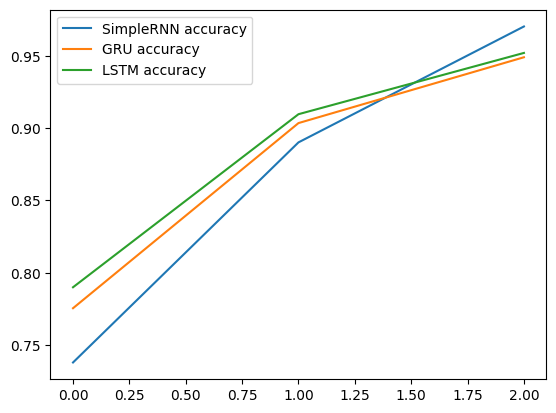

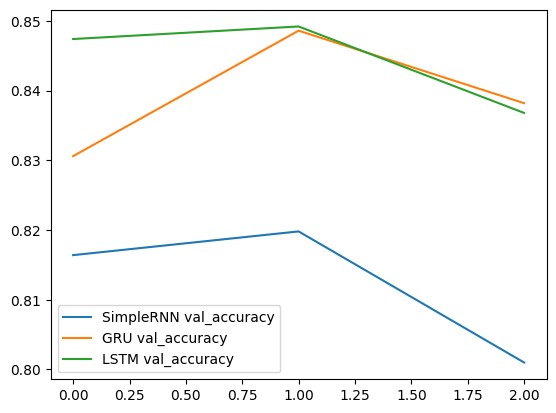

In [5]:
import matplotlib.pyplot as plt

def plot_results(histories, metric):
    for name, history in histories.items():
        plt.plot(history.history[metric], label=f'{name} {metric}')
    plt.legend()
    plt.show()

histories = {
    'SimpleRNN': history_rnn,
    'GRU': history_gru,
    'LSTM': history_lstm
}

plot_results(histories, 'accuracy')
plot_results(histories, 'val_accuracy')


In [6]:
test_rnn = model_rnn.evaluate(x_test, y_test, verbose=0)
test_gru = model_gru.evaluate(x_test, y_test, verbose=0)
test_lstm = model_lstm.evaluate(x_test, y_test, verbose=0)

print(f"SimpleRNN Test Accuracy: {test_rnn[1]:.4f}")
print(f"GRU Test Accuracy: {test_gru[1]:.4f}")
print(f"LSTM Test Accuracy: {test_lstm[1]:.4f}")


SimpleRNN Test Accuracy: 0.7984
GRU Test Accuracy: 0.8380
LSTM Test Accuracy: 0.8322


In [7]:
from keras.datasets import reuters
from keras.preprocessing.sequence import pad_sequences

# Load Reuters dataset
max_features = 20000  # Top 20k words
maxlen = 100  # Cut sequences after 100 words
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# Pad sequences to ensure uniform input length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Print dataset info
print(f"Training samples: {len(x_train)}")
print(f"Test samples: {len(x_test)}")


2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step
Training samples: 8982
Test samples: 2246


In [8]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model_rnn = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    SimpleRNN(32),
    Dense(46, activation='softmax')  # 46 topics in the Reuters dataset
])

model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_rnn = model_rnn.fit(x_train, y_train, validation_split=0.2, epochs=3, batch_size=64)


Epoch 1/3
113/113 ━━━━━━━━━━━━━━━━━━━━ 36s 143ms/step - accuracy: 0.2382 - loss: 2.9821 - val_accuracy: 0.4229 - val_loss: 2.2375
Epoch 2/3
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 131ms/step - accuracy: 0.5009 - loss: 2.0618 - val_accuracy: 0.4975 - val_loss: 2.0345
Epoch 3/3
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.5540 - loss: 1.7556 - val_accuracy: 0.4741 - val_loss: 2.1196


In [9]:
from keras.layers import GRU

model_gru = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    GRU(32),
    Dense(46, activation='softmax')  # 46 topics in the Reuters dataset
])

model_gru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_gru = model_gru.fit(x_train, y_train, validation_split=0.2, epochs=3, batch_size=64)


Epoch 1/3
113/113 ━━━━━━━━━━━━━━━━━━━━ 49s 231ms/step - accuracy: 0.3434 - loss: 3.0470 - val_accuracy: 0.4647 - val_loss: 2.0621
Epoch 2/3
113/113 ━━━━━━━━━━━━━━━━━━━━ 40s 217ms/step - accuracy: 0.4825 - loss: 1.9568 - val_accuracy: 0.5387 - val_loss: 1.7813
Epoch 3/3
113/113 ━━━━━━━━━━━━━━━━━━━━ 43s 232ms/step - accuracy: 0.5707 - loss: 1.6546 - val_accuracy: 0.5615 - val_loss: 1.7039


In [10]:
from keras.layers import LSTM

model_lstm = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    LSTM(32),
    Dense(46, activation='softmax')  # 46 topics in the Reuters dataset
])

model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(x_train, y_train, validation_split=0.2, epochs=3, batch_size=64)


Epoch 1/3
113/113 ━━━━━━━━━━━━━━━━━━━━ 40s 192ms/step - accuracy: 0.3493 - loss: 3.1045 - val_accuracy: 0.4830 - val_loss: 2.0589
Epoch 2/3
113/113 ━━━━━━━━━━━━━━━━━━━━ 38s 166ms/step - accuracy: 0.4996 - loss: 1.9507 - val_accuracy: 0.5437 - val_loss: 1.7848
Epoch 3/3
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 171ms/step - accuracy: 0.6037 - loss: 1.6315 - val_accuracy: 0.5921 - val_loss: 1.6071


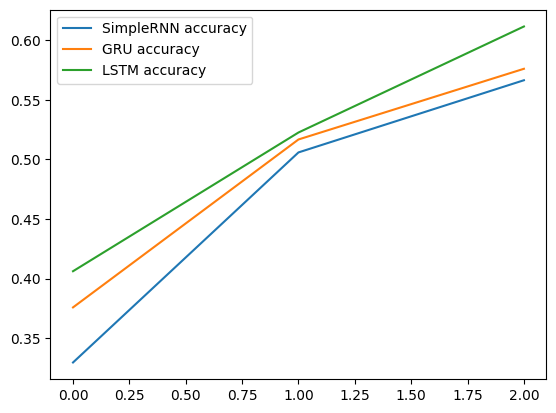

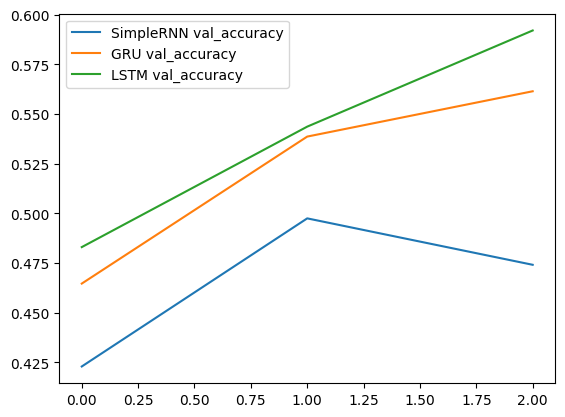

In [11]:
import matplotlib.pyplot as plt

def plot_results(histories, metric):
    for name, history in histories.items():
        plt.plot(history.history[metric], label=f'{name} {metric}')
    plt.legend()
    plt.show()

histories = {
    'SimpleRNN': history_rnn,
    'GRU': history_gru,
    'LSTM': history_lstm
}

plot_results(histories, 'accuracy')
plot_results(histories, 'val_accuracy')


In [12]:
test_rnn = model_rnn.evaluate(x_test, y_test, verbose=0)
test_gru = model_gru.evaluate(x_test, y_test, verbose=0)
test_lstm = model_lstm.evaluate(x_test, y_test, verbose=0)

print(f"SimpleRNN Test Accuracy: {test_rnn[1]:.4f}")
print(f"GRU Test Accuracy: {test_gru[1]:.4f}")
print(f"LSTM Test Accuracy: {test_lstm[1]:.4f}")


SimpleRNN Test Accuracy: 0.4760
GRU Test Accuracy: 0.5610
LSTM Test Accuracy: 0.5788


In [13]:
from keras.layers import RNN, SimpleRNNCell
cell = SimpleRNNCell(64)
rnn_layer = RNN(cell)


In [14]:
from keras.layers import SimpleRNNCell
cell = SimpleRNNCell(64)  # 64 units in the cell


In [15]:
from keras.layers import GRUCell
gru_cell = GRUCell(64)  # GRU unit with 64 units


In [16]:
from keras.layers import LSTMCell
lstm_cell = LSTMCell(64)  # LSTM unit with 64 units


In [17]:
from keras.layers import StackedRNNCells, SimpleRNNCell, LSTMCell
stacked_cells = StackedRNNCells([SimpleRNNCell(64), LSTMCell(64)])


In [21]:
from keras.layers import GRU
from keras.models import Sequential

model = Sequential()
model.add(GRU(64, input_shape=(None, 100)))  # 64 units
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\Mercy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
from keras.layers import LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(64, input_shape=(None, 100)))  # 64 units
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [24]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0
